In [1]:
## import statements ##

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import nltk
from nltk.corpus import stopwords
import re


import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)

In [2]:
train_data = pd.read_csv('train_tweet.csv')

# Cleaning the data

In [3]:
def drop_features(features,data):
    data.drop(features,inplace=True,axis=1)

In [4]:
import re
def process_tweet(tweet):
    tweet=str(tweet)
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet.lower()).split())

In [5]:
def sentiment(label):
    if label<0:
        return -1
    elif label==0:
        return 0
    else:
        return 1

In [6]:
def sentiment_word(sentiment):
    if sentiment==-1:
        return "Negative"
    elif sentiment==1:
        return "Positive"
    else:
        return "Neutral"

In [7]:
train_data['processed_tweets'] = train_data['tweet'].apply(process_tweet)

In [8]:
train_data['sentiment'] = train_data['label'].apply(sentiment)

In [9]:
train_data['tweet_sentiment'] = train_data['sentiment'].apply(sentiment_word)

In [10]:
drop_features(['tweet'],train_data)

In [11]:
# (train_data['processed_tweets'])[0].split()
words_in_tweet = [tweet.lower().split() for tweet in (train_data['processed_tweets'])]

In [12]:


(train_data['processed_tweets1']) = pd.Series(list(itertools.chain(*words_in_tweet)))

# Create counter
counts_no_urls = collections.Counter((train_data['processed_tweets1']))

counts_no_urls.most_common(25)

[('the', 2712),
 ('to', 2443),
 ('i', 1694),
 ('a', 1613),
 ('and', 1325),
 ('you', 1296),
 ('of', 1262),
 ('t', 1171),
 ('for', 1165),
 ('is', 1128),
 ('in', 1125),
 ('s', 895),
 ('it', 881),
 ('my', 862),
 ('on', 706),
 ('this', 664),
 ('be', 627),
 ('with', 549),
 ('that', 542),
 ('love', 528),
 ('co', 526),
 ('day', 522),
 ('https', 519),
 ('are', 497),
 ('amp', 469)]

In [13]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,the,2712
1,to,2443
2,i,1694
3,a,1613
4,and,1325


In [14]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['had',
 'couldn',
 'their',
 'very',
 'didn',
 'wasn',
 'as',
 'mustn',
 'out',
 'yours']

In [15]:
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[800]

['rt',
 'legacy',
 'outlets',
 'like',
 'continue',
 'unethically',
 'parade',
 'dr',
 'kellner',
 'credible',
 'source',
 'topics',
 'like',
 'child',
 'vaccinatio']

In [16]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(10)

[('co', 70221),
 ('https', 69916),
 ('vaccine', 26401),
 ('moderna', 19971),
 ('covaxin', 12113),
 ('covid', 10146),
 ('covid19', 9111),
 ('dose', 7841),
 ('sputnikv', 7787),
 ('first', 7739)]

In [17]:
collection_words = ['covaxin', 'sputnikv', 'moderna', 'covishield','pfizer']

In [18]:
tweets_nsw_nc = [[w for w in word if w in collection_words]
                 for word in tweets_nsw]

In [19]:
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('moderna', 19971),
 ('covaxin', 12113),
 ('sputnikv', 7787),
 ('pfizer', 5397),
 ('covishield', 2125)]

In [20]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()

,words,count
0,moderna,19971
1,covaxin,12113
2,sputnikv,7787
3,pfizer,5397
4,covishield,2125


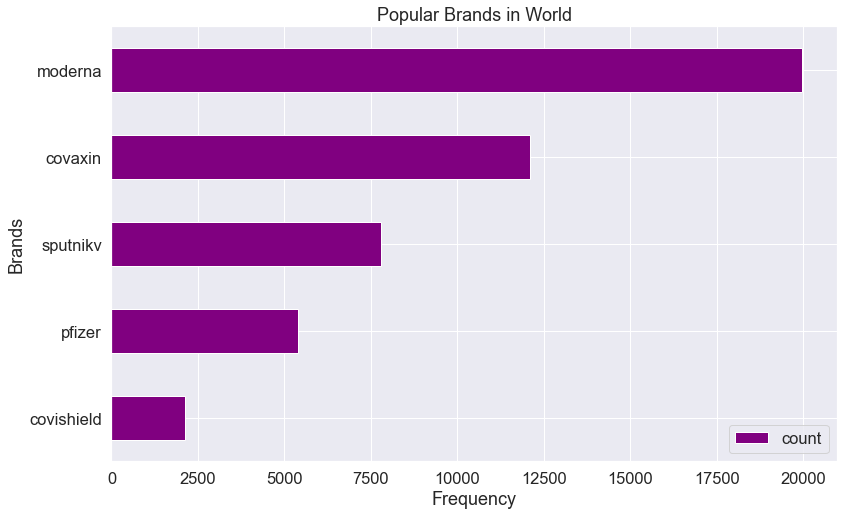

In [21]:
fig, ax = plt.subplots(figsize=(13, 8))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")
ax.set(xlabel='Frequency', ylabel='Brands')
ax.set_title("Popular Brands in World")

fig.savefig('static/images/brands.png')